<a href="https://colab.research.google.com/github/josooik/DeepLearning/blob/main/7_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터
---

## 1. 데이터 불러오기

In [28]:
# MNIST tensofrflow.keras
from tensorflow.keras import datasets
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [29]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## 2. 데이터 시각화 (EDA)

In [30]:
import matplotlib.pyplot as plt

* 이미지 확인

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


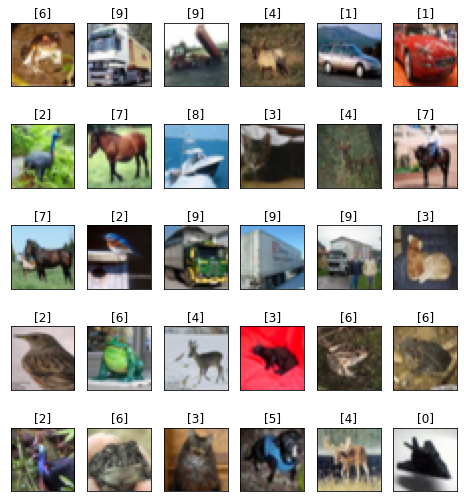

In [31]:
plt.figure(figsize=(8, 9))

for i in range(30):
  plt.subplot(5, 6, i + 1)
  img = x_train[i]
  label = y_train[i]

  plt.imshow(img)
  plt.title(label)
  plt.xticks([])
  plt.yticks([])
  
plt.show()

* 실제 데이터 확인

In [32]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


* 데이터 시각화

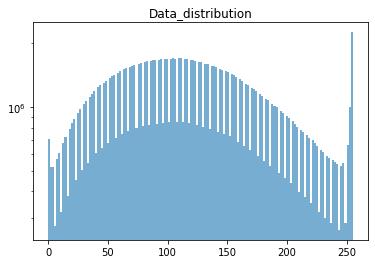

In [33]:
plt.title("Data_distribution")
plt.hist(np.reshape(x_train, (50000 * 32 * 32 * 3)), log=True, bins=150, alpha=0.6)
plt.show()

## 3. 데이터 전처리
  * 정규화
  * 원핫벡터


### **min max normalization**

# <center>$\frac{x-x_{min}}{x_{max}-x_{min}}$</center>

In [34]:
def minmax(x):
  x_min = np.min(x)
  x_max = np.max(x)
  print(x_min, x_max)
  
  return (x - x_min) / (x_max - x_min)

In [35]:
x_train_minmax = minmax(x_train)
x_test_minmax = minmax(x_test)

x_train_minmax.shape, x_test_minmax.shape

0 255
0 255


((50000, 32, 32, 3), (10000, 32, 32, 3))

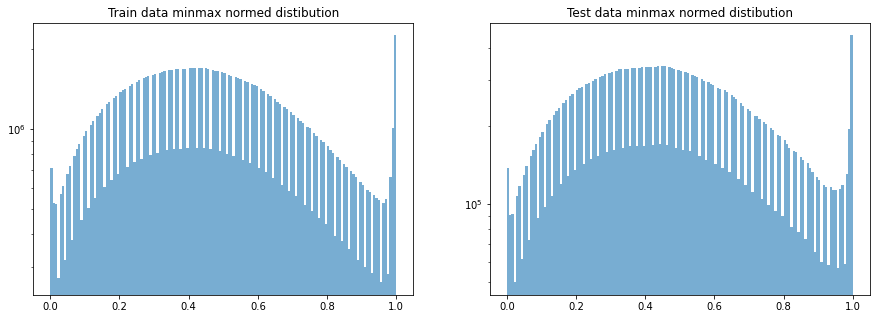

In [36]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Train data minmax normed distibution")
plt.hist(np.reshape(x_train_minmax, (50000 * 32 * 32 * 3)), log=True, bins=150, alpha=0.6)

plt.subplot(1, 2, 2)
plt.title("Test data minmax normed distibution")
plt.hist(np.reshape(x_test_minmax, (10000 * 32 * 32 * 3)), log=True, bins=150, alpha=0.6)

plt.show()

### **Z-Score Normalization**


# <center>$\frac{x-\bar{x}}{\sigma}$</center>

In [37]:
def z_score(x):
  x_mean = np.mean(x)
  x_std = np.std(x)
  print(x_mean, x_std)
  
  return (x - x_mean) / (x_std)

In [38]:
x_train_z_score = z_score(x_train)
x_test_z_score = z_score(x_test)

x_train_z_score.shape, x_test_z_score.shape

120.70756512369792 64.1500758911213
121.52915475260417 64.06097012299574


((50000, 32, 32, 3), (10000, 32, 32, 3))

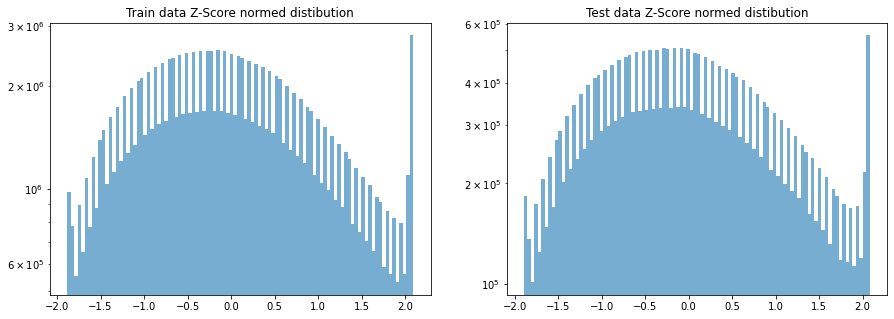

In [39]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Train data Z-Score normed distibution")
plt.hist(np.reshape(x_train_z_score, (50000 * 32 * 32 * 3)), log=True, bins=100, alpha=0.6)

plt.subplot(1, 2, 2)
plt.title("Test data Z-Score normed distibution")
plt.hist(np.reshape(x_test_z_score, (10000 * 32 * 32 * 3)), log=True, bins=100, alpha=0.6)

plt.show()

### **one-hot coding**

In [40]:
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

y_train_onehot.shape, y_test_onehot.shape

((50000, 10), (10000, 10))

# 모델
---

## 1. 모델구현
---

In [41]:
from tensorflow.keras import models, layers, optimizers

### **Softmax regression**

In [42]:
sr = models.Sequential(name='Softmax_regression')

sr.add(layers.Flatten(input_shape=[32, 32, 3]))
sr.add(layers.Dense(10, activation='softmax'))

sr.summary()

Model: "Softmax_regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


### **DNN**

In [43]:
dnn = models.Sequential(name='DNN')

# Input layer
dnn.add(layers.Flatten(input_shape=[32, 32, 3]))

# hidden layer
dnn.add(layers.Dense(128, activation='relu'))
dnn.add(layers.Dense(128, activation='relu'))
dnn.add(layers.Dense(128, activation='relu'))
dnn.add(layers.Dense(128, activation='relu'))


# output layer
dnn.add(layers.Dense(10, activation='softmax'))

dnn.summary()

Model: "DNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 444,170
Trainable params: 444,170
Non-trainable params: 0
_________________________________________________________

### **CNN**

In [44]:
cnn = models.Sequential(name='CNN')

# x data : (32, 32, 3) -> 3차원
# dense : (764) -> 1차원
# convolution : (32, 32, 3) -> 3차원

# input layer
cnn.add(layers.Reshape([32, 32, 3], input_shape=[32, 32, 3]))

# hidden layer
cnn.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
cnn.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=3))

cnn.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
cnn.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=3))

# output layer
cnn.add(layers.Flatten())
cnn.add(layers.Dense(10, activation='softmax'))

cnn.summary()


Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 5, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0       

## 2. 학습
---

### **Softmax Regression**

In [45]:
sr.compile(optimizer = optimizers.SGD(learning_rate=0.01),
           loss = 'categorical_crossentropy',
           metrics = ['acc'])

hist_sr = sr.fit(x_train_minmax, y_train_onehot, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9492 - acc: 0.3064
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8442 - acc: 0.3524
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8183 - acc: 0.3648
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7956 - acc: 0.3731
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7829 - acc: 0.3768
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7739 - acc: 0.3831
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7655 - acc: 0.3865
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7604 - acc: 0.3871
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7544 - acc: 0.3908
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7457 - acc: 0.3933
Epoch 11/50
1563/1563 [======

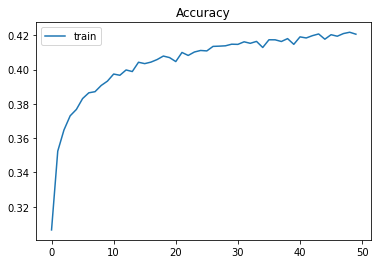

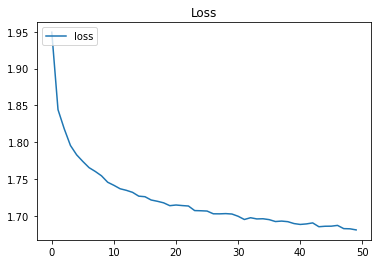

In [46]:
# loss : 훈련 손실값
# acc : 훈련 정확도
# val_loss : 검증 손실값
# val_acc : 검증 정확도

plt.plot(hist_sr.history['acc'])
#plt.plot(hist_sr.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(hist_sr.history['loss'])
#plt.plot(hist_sr.history['val_loss'])
plt.title('Loss')
plt.legend(['loss'], loc='upper left')
plt.show()

### **DNN**

In [47]:
dnn.compile(optimizer = optimizers.SGD(learning_rate=0.01),
           loss = 'categorical_crossentropy',
           metrics = ['acc'])

hist_dnn = dnn.fit(x_train_minmax, y_train_onehot, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9347 - acc: 0.2995
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7387 - acc: 0.3724
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6509 - acc: 0.4080
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5897 - acc: 0.4315
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5427 - acc: 0.4510
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5049 - acc: 0.4619
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4721 - acc: 0.4733
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4443 - acc: 0.4868
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4173 - acc: 0.4958
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3949 - acc: 0.5049
Epoch 11/50
1563/1563 [======

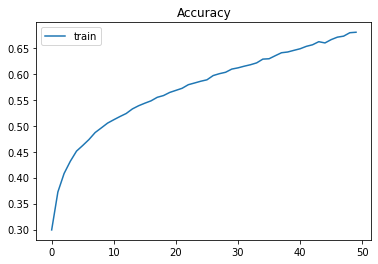

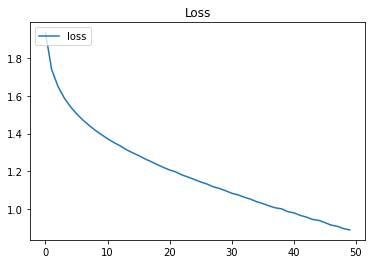

In [48]:
# loss : 훈련 손실값
# acc : 훈련 정확도
# val_loss : 검증 손실값
# val_acc : 검증 정확도

plt.plot(hist_dnn.history['acc'])
#plt.plot(hist_dnn.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(hist_dnn.history['loss'])
#plt.plot(hist_dnn.history['val_loss'])
plt.title('Loss')
plt.legend(['loss'], loc='upper left')
plt.show()

### CNN

In [49]:
cnn.compile(optimizer = optimizers.SGD(learning_rate=0.01),
           loss = 'categorical_crossentropy',
           metrics = ['acc'])

hist_cnn = cnn.fit(x_train_minmax, y_train_onehot, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 15s 9ms/step - loss: 2.1063 - acc: 0.2158
Epoch 2/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8705 - acc: 0.3147
Epoch 3/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6586 - acc: 0.3965
Epoch 4/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5176 - acc: 0.4561
Epoch 5/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4229 - acc: 0.4950
Epoch 6/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3432 - acc: 0.5280
Epoch 7/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2780 - acc: 0.5515
Epoch 8/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2212 - acc: 0.5742
Epoch 9/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1678 - acc: 0.5946
Epoch 10/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1221 - acc: 0.6108
Epoch 11/

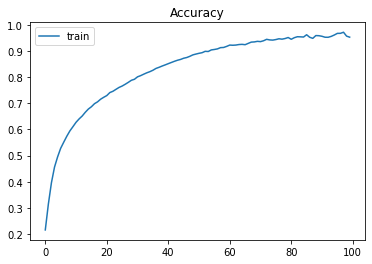

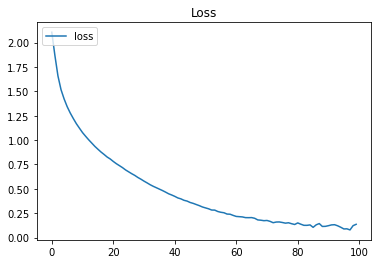

In [50]:
# loss : 훈련 손실값
# acc : 훈련 정확도
# val_loss : 검증 손실값
# val_acc : 검증 정확도

plt.plot(hist_cnn.history['acc'])
#plt.plot(hist_cnn.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(hist_cnn.history['loss'])
#plt.plot(hist_cnn.history['val_loss'])
plt.title('Loss')
plt.legend(['loss'], loc='upper left')
plt.show()

## 3. 성능평가
---

### Softmax Regression

In [51]:
# eavluate : 성능 평가 test셋을 평가할때, test의 y(label이 있으면)
# predict : label 없을때 / 값 예측하고싶을때

sr.evaluate(x_test_minmax, y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 1.8269 - acc: 0.3745


[1.8268693685531616, 0.37450000643730164]

### DNN

In [52]:
# eavluate : 성능 평가 test셋을 평가할때, test의 y(label이 있으면)
# predict : label 없을때 / 값 예측하고싶을때

dnn.evaluate(x_test_minmax, y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 1.5387 - acc: 0.5143


[1.5386786460876465, 0.5142999887466431]

### CNN

In [53]:
# eavluate : 성능 평가 test셋을 평가할때, test의 y(label이 있으면)
# predict : label 없을때 / 값 예측하고싶을때

cnn.evaluate(x_test_minmax, y_test_onehot)

313/313 [==============================] - 2s 6ms/step - loss: 3.0014 - acc: 0.6424


[3.0013766288757324, 0.6424000263214111]